# Importing Librarries

In [1]:
import re 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Importing Datasets

In [2]:
train=pd.read_csv('Wns_files//train//train.csv')
test=pd.read_csv('Wns_files//test.csv')
item=pd.read_csv('Wns_files//train//item_data.csv')
viewlog=pd.read_csv('Wns_files//train//view_log.csv')
sub=pd.read_csv('Wns_files//sample_submission.csv')

# Data Exploration

In [3]:
train.shape,test.shape,item.shape,viewlog.shape,sub.shape

((237609, 7), (90675, 6), (132761, 6), (3118622, 5), (90675, 2))

In [4]:
train.duplicated().sum(),test.duplicated().sum(),sub.duplicated().sum()

(0, 0, 0)

In [5]:
train.nunique()

impression_id      237609
impression_time     36461
user_id             74723
app_code              490
os_version              3
is_4G                   2
is_click                2
dtype: int64

In [6]:
train.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1


In [7]:
test.nunique()

impression_id      90675
impression_time     9636
user_id            34079
app_code             373
os_version             3
is_4G                  2
dtype: int64

In [8]:
test.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0


In [9]:
item.head(2)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822


In [10]:
viewlog.head(2)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640


In [11]:
sub.head(2)

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0
1,caac14a5bf2ba283db7708bb34855760,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


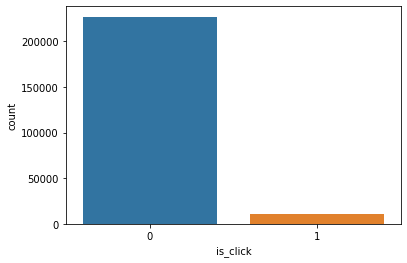

In [13]:
sns.countplot(train['is_click'])

In [14]:
train.is_click.value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

In [15]:
train.is_click.value_counts()/train.shape[0]

0    0.954286
1    0.045714
Name: is_click, dtype: float64

In [16]:
train['impression_time']=pd.to_datetime(train['impression_time'])

Text(0.5, 1.0, 'Number of clicks with respect to impression time')

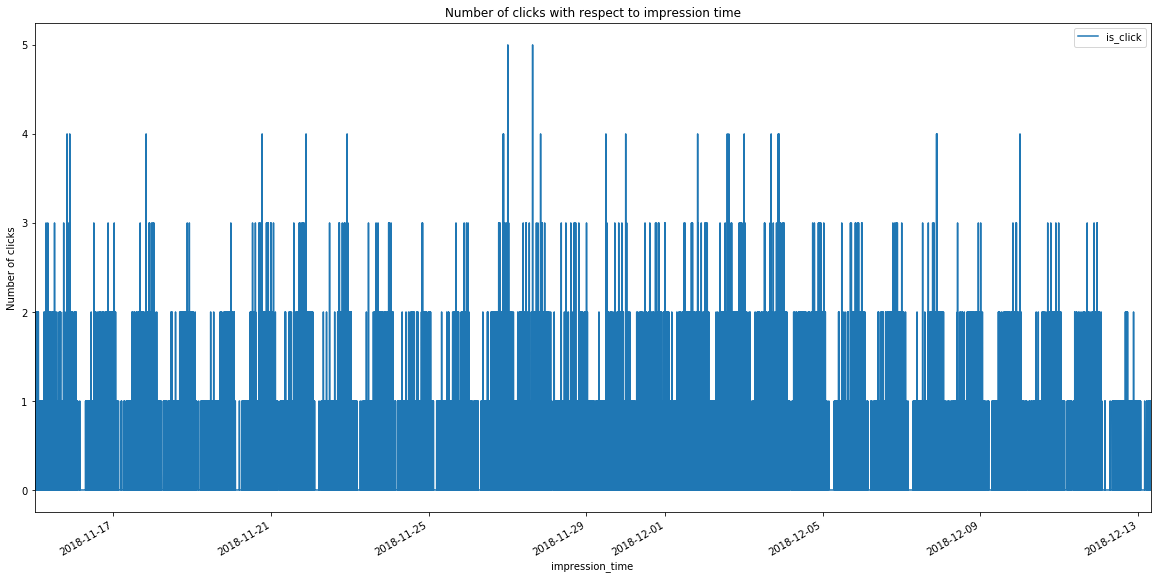

In [17]:
train.groupby(train['impression_time']).agg({'is_click':'sum'}).plot(figsize=(20,10))
plt.ylabel('Number of clicks')
plt.title('Number of clicks with respect to impression time')

Text(0.5, 1.0, 'Number of clicks with respect to the day of the month')

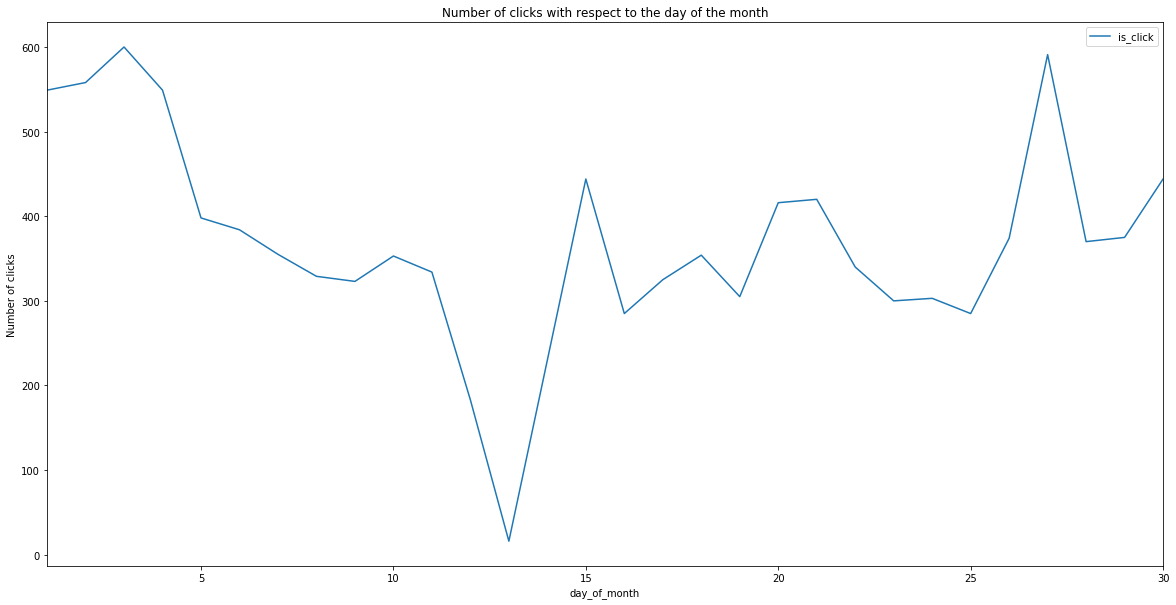

In [18]:
train['day_of_month']=train['impression_time'].dt.day
train.groupby(train['day_of_month']).agg({'is_click':'sum'}).plot(figsize=(20,10))
plt.ylabel('Number of clicks')
plt.title('Number of clicks with respect to the day of the month')

Text(0.5, 1.0, 'Number of clicks with respect to the hour of the day')

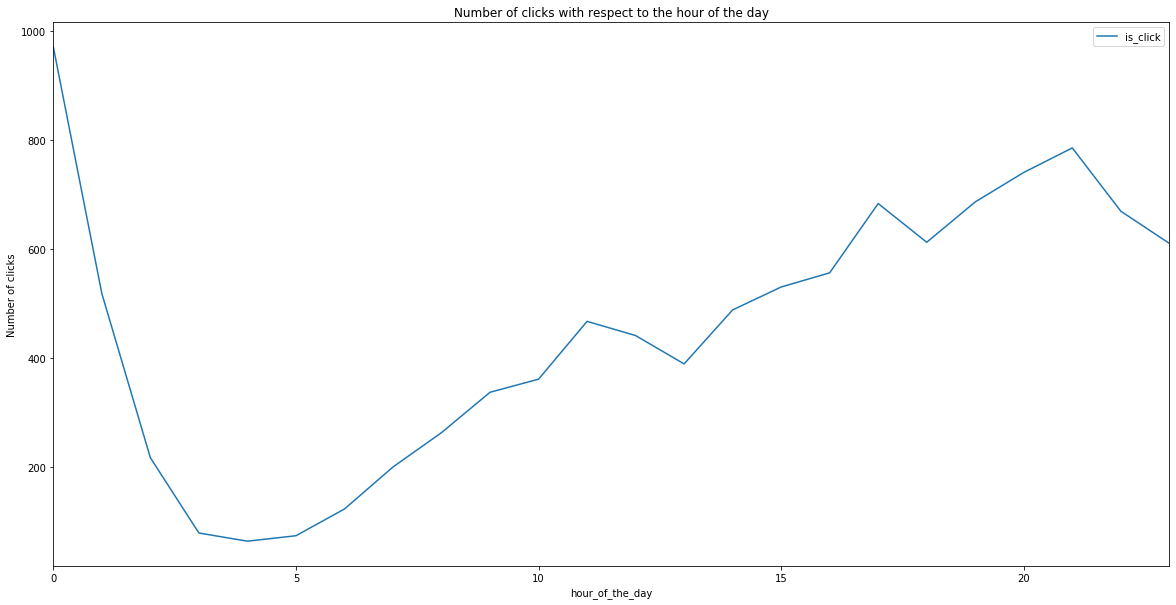

In [19]:
train['hour_of_the_day']=train['impression_time'].dt.hour
train.groupby(train['hour_of_the_day']).agg({'is_click':'sum'}).plot(figsize=(20,10))
plt.ylabel('Number of clicks')
plt.title('Number of clicks with respect to the hour of the day')

Text(0.5, 1.0, 'Number of clicks in each hour')

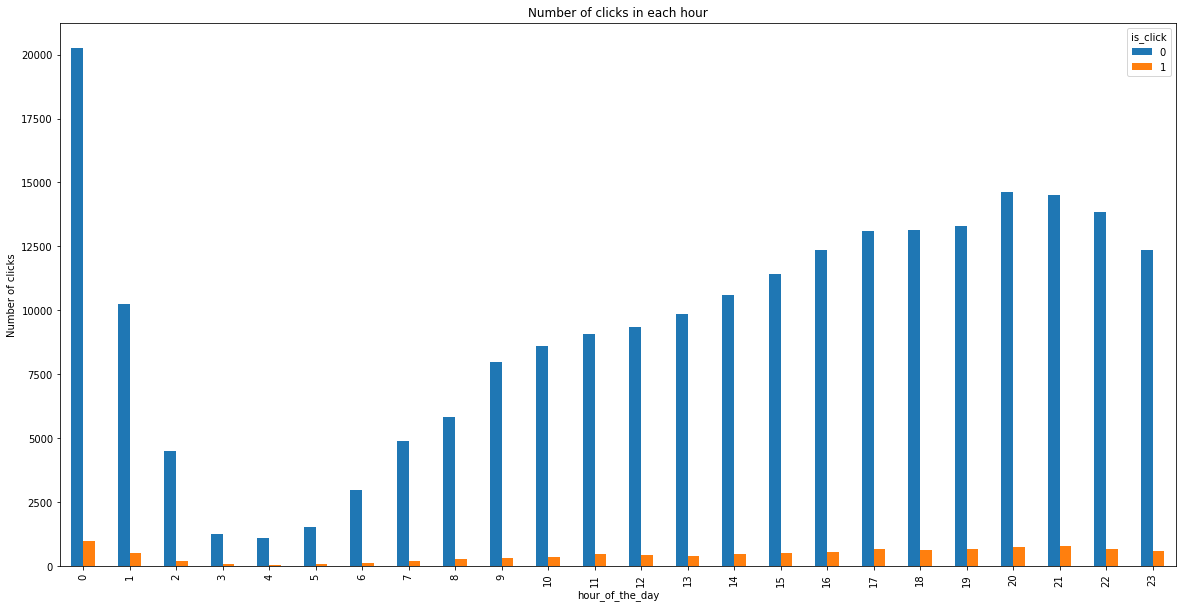

In [20]:
train.groupby(['hour_of_the_day','is_click']).size().unstack().plot(kind='bar',figsize=(20,10))
plt.ylabel('Number of clicks')
plt.title('Number of clicks in each hour')

1.we are taking clicks and hours(24) and doing barplot 

Text(0.5, 1.0, 'Hourly counter of all the posite clicks')

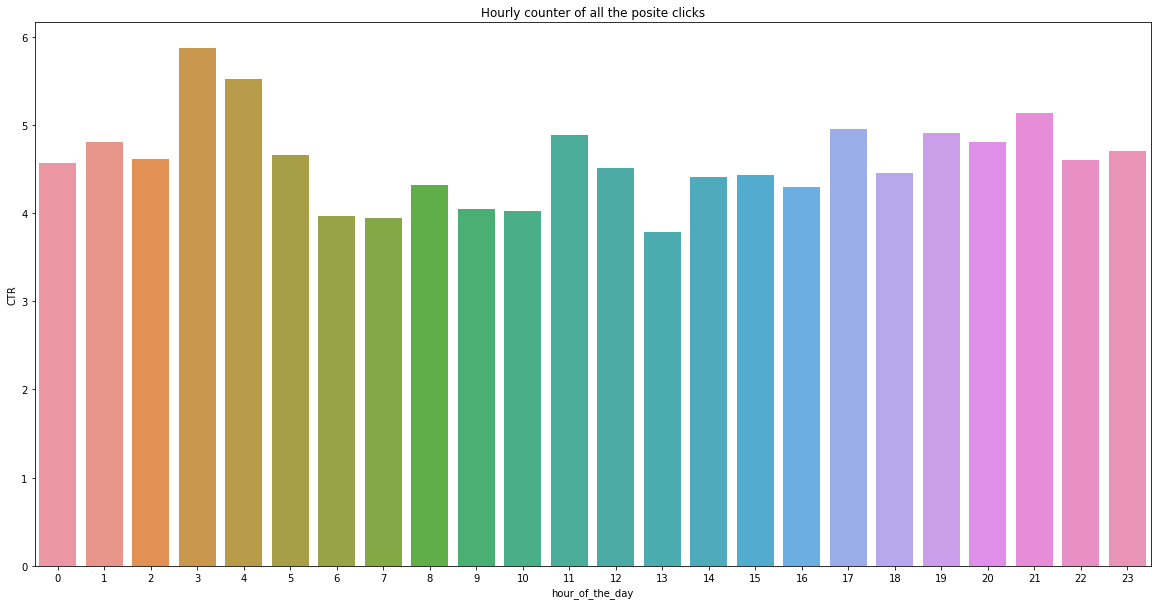

In [21]:
df_click=train[train['is_click']==1]
df_hour=train[['hour_of_the_day','is_click']].groupby(['hour_of_the_day']).count().reset_index()
df_hour=df_hour.rename(columns={'is_click':'impressions'})
df_hour['clicks']=df_click[['hour_of_the_day','is_click']].groupby(['hour_of_the_day']).count().reset_index()['is_click']
df_hour['CTR']=(df_hour['clicks']/df_hour['impressions'])*100
plt.figure(figsize=(20,10))
sns.barplot(x='hour_of_the_day',y='CTR',data=df_hour)
plt.title('Hourly counter of all the posite clicks')

1.we are creating new data frame of is_click which will contain the clicks that is done  
2.now we are creating another df which will have all the clicks in the 24 hours of the day,we are grouping by hours  
3.now we are checking the click that have beeen done(i.e.=1) in all the 24 hours by creating new col  
4.Now we are taking percentage of click done by total clicks in all the 24 hours  
5.Now plotting the click done and total clicks in barplot

In [22]:
train.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_the_day
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,15,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,15,0


Text(0.5, 1.0, 'Number of clicks in each weekday')

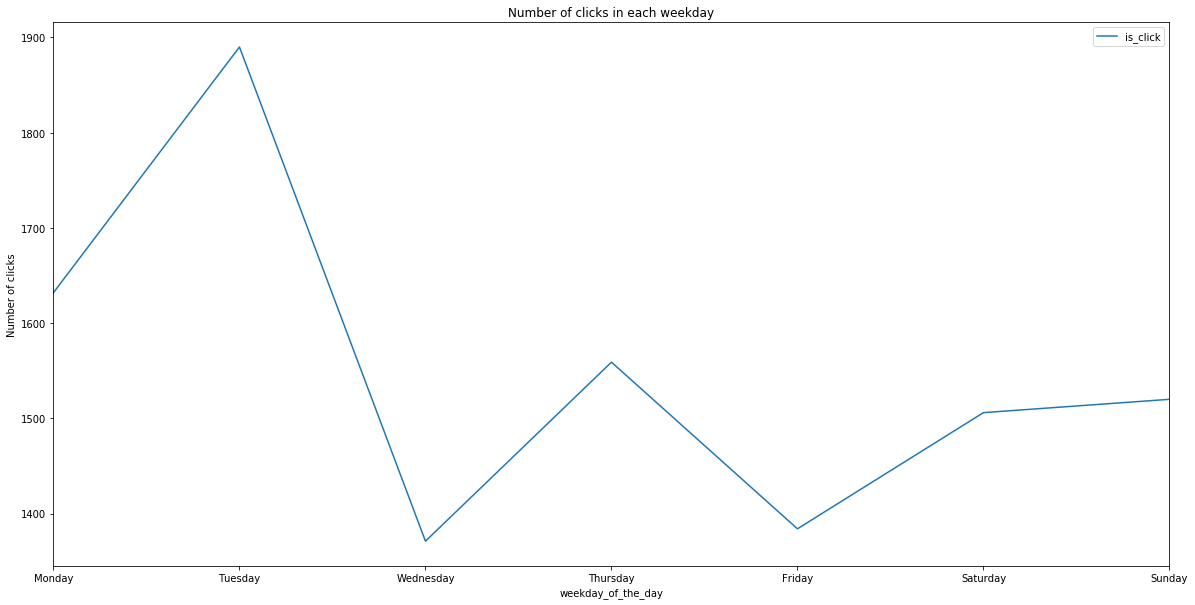

In [23]:
train['weekday_of_the_day']=train['impression_time'].dt.weekday_name
columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train.groupby('weekday_of_the_day').agg({'is_click':'sum'}).reindex(columns).plot(figsize=(20,10))
ticks=list(range(0,7,1))
plt.xticks(ticks,columns)
plt.ylabel('Number of clicks')
plt.title('Number of clicks in each weekday')

Text(0.5, 1.0, 'Impressions vs number of clicks in a day of a week')

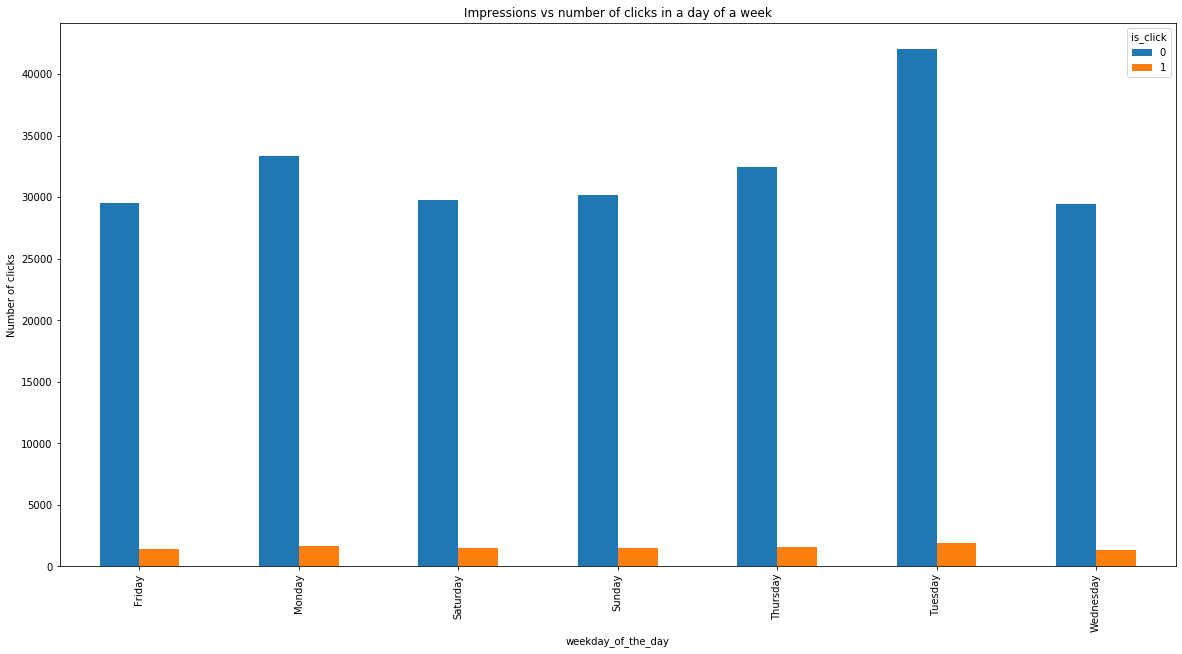

In [24]:
train.groupby(['weekday_of_the_day','is_click']).size().unstack().plot(kind='bar',figsize=(20,10))
plt.ylabel('Number of clicks')
plt.title('Impressions vs number of clicks in a day of a week')

In [25]:
train.head(1)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_the_day,weekday_of_the_day
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15,87862,422,old,0,0,15,0,Thursday


In [26]:
df_click.head(1)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_the_day
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,15,0


Text(0.5, 1.0, 'Day of week CTR')

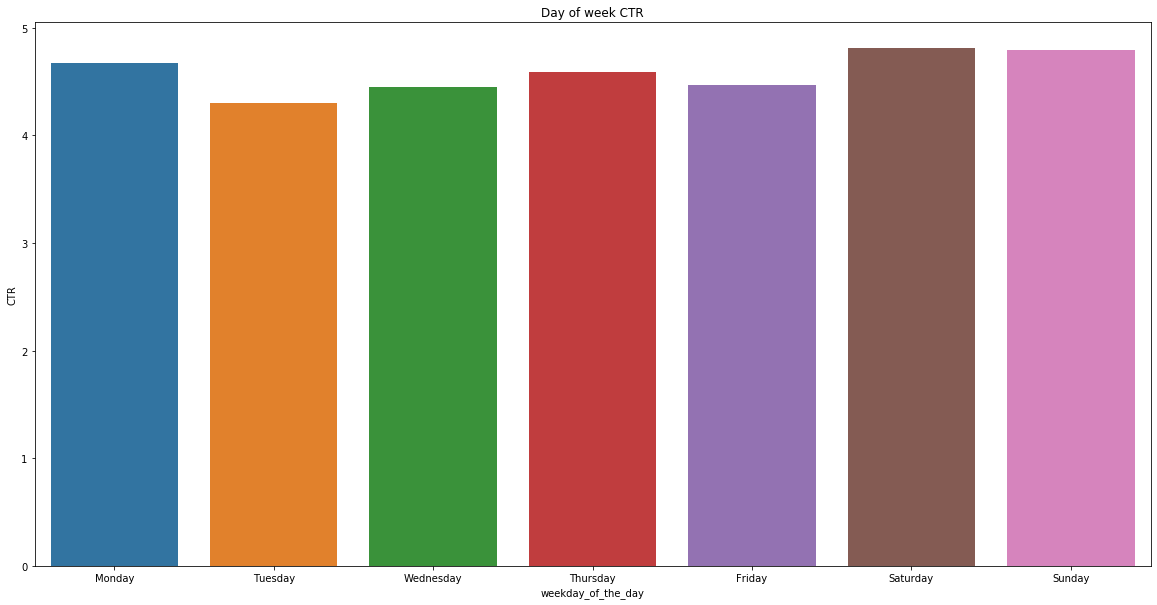

In [27]:
df_click=train[train['is_click']==1]
df_dayofweek=train[['weekday_of_the_day','is_click']].groupby('weekday_of_the_day').count().reset_index()
df_dayofweek=df_dayofweek.rename(columns={'is_click':'impressions'})
df_dayofweek['clicks']=df_click[['weekday_of_the_day','is_click']].groupby('weekday_of_the_day').count().reset_index()['is_click']
df_dayofweek['CTR']=(df_dayofweek['clicks']/df_dayofweek['impressions'])*100
plt.figure(figsize=(20,10))
sns.barplot(y='CTR',x='weekday_of_the_day',data=df_dayofweek,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR')

In [28]:
train['os_version'].value_counts()/len(train)

latest          0.543818
intermediate    0.233758
old             0.222424
Name: os_version, dtype: float64

In [29]:
Osversion=train['os_version'].unique()
Osversion.sort()
for i in Osversion:
    avg=train.loc[np.where((train['os_version']==i))]['is_click'].mean()
    print('for osversion {} click rate is{}'.format(i,avg))

for osversion intermediate click rate is0.051761698143780496
for osversion latest click rate is0.04165118870728083
for osversion old click rate is0.04929044465468307


taken threee columns unique names  
doing mean for each unique names   
returning mean for each unique names

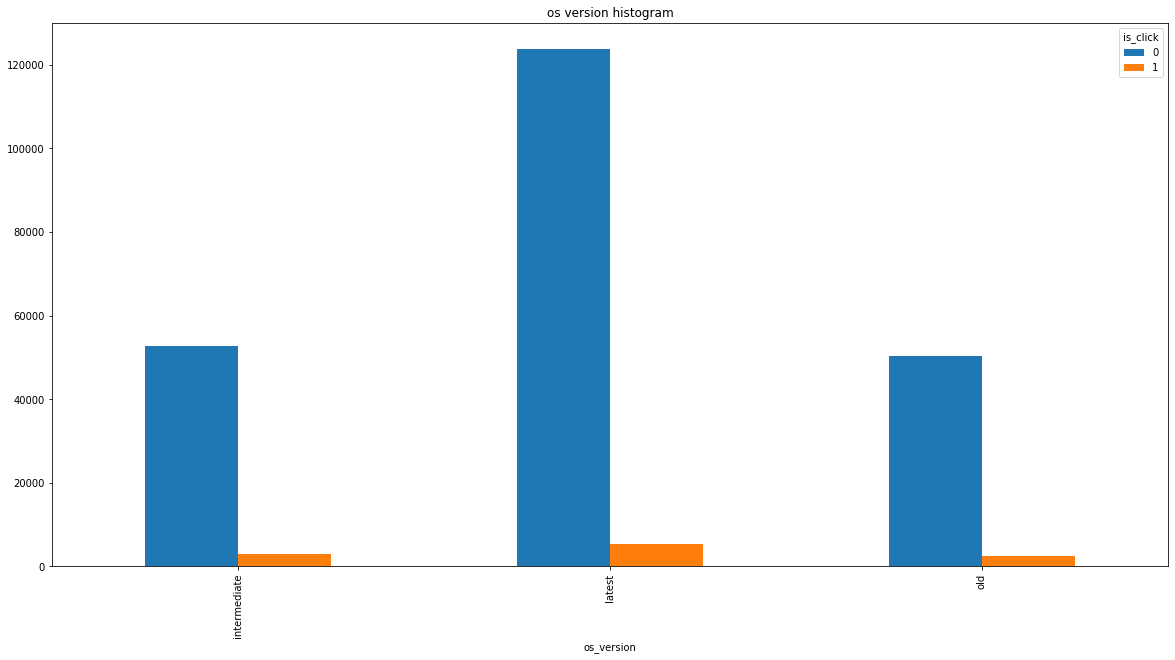

In [30]:
train.groupby(['os_version','is_click']).size().unstack().plot(kind='bar',figsize=(20,10),title='os version histogram')

size() on a groupby result in order to count how many items are in each group.

In [31]:
train.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_the_day,weekday_of_the_day
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,15,0,Thursday
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,15,0,Thursday


In [32]:
train['is_4G'].value_counts()/len(train)

0    0.638688
1    0.361312
Name: is_4G, dtype: float64

In [33]:
is4g=train['is_4G'].unique()
is4g.sort()
for i in is4g:
    avg1=train.loc[np.where((train['is_4G']==i))]['is_click'].mean()
    print('For 4g {} click rate is {}'.format(i,avg1))

For 4g 0 click rate is 0.04625785790534931
For 4g 1 click rate is 0.04475195396675636


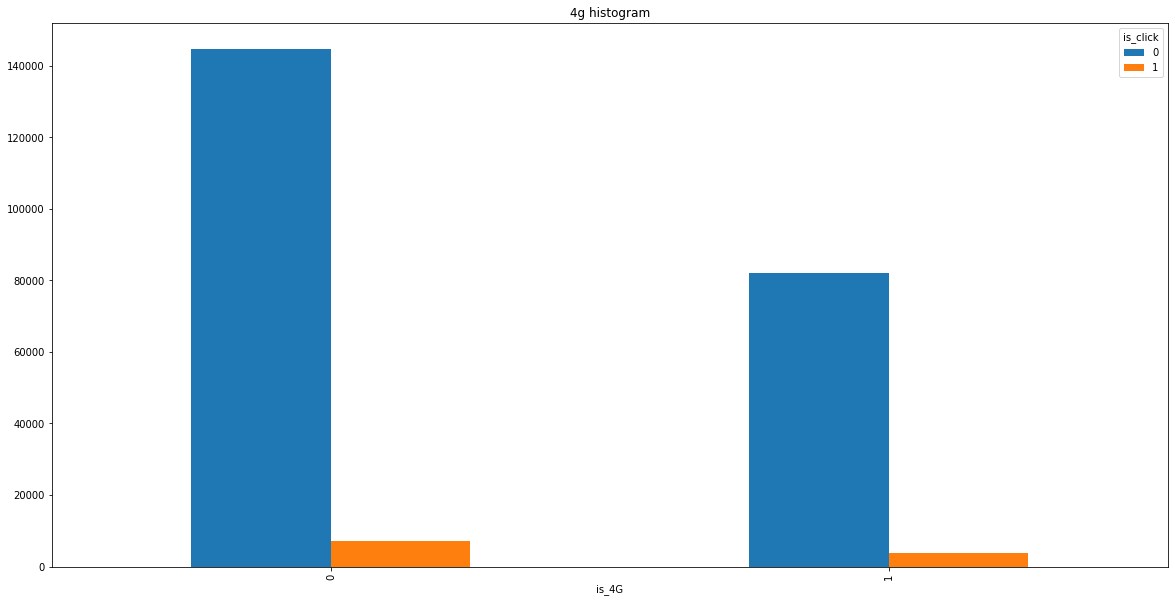

In [34]:
train.groupby(['is_4G','is_click']).size().unstack().plot(kind='bar',figsize=(20,10),title='4g histogram')

In [35]:
train.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_the_day,weekday_of_the_day
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,15,0,Thursday
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,15,0,Thursday
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,15,0,Thursday


In [36]:
train.drop(['day_of_month','hour_of_the_day','weekday_of_the_day'],axis=1,inplace=True)

In [37]:
train.shape

(237609, 7)

# Data Preprocessing

In [38]:
df=train.append(test,ignore_index=True,sort=False)
df.shape

(328284, 7)

Here i have combined the training and testing set

In [39]:
calc=df.groupby('user_id',axis=0).agg({'app_code':'count'}).reset_index()
calc.columns=['user_id','count_of_users_based_on_app_code_of_partner_website']
df=df.merge(calc,on='user_id',how='left')
calc1=df.groupby('user_id',axis=0).agg({'is_4G':'sum'}).reset_index()
calc1.columns=['user_id','count_of_users_based_on_4g_usedornot']
df=df.merge(calc1,on='user_id',how='left')

In [40]:
df.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,count_of_users_based_on_app_code_of_partner_website,count_of_users_based_on_4g_usedornot
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0.0,3,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1.0,61,61


In [41]:
df=pd.get_dummies(df,columns=['app_code','os_version'],drop_first=True)

In [42]:
df.columns

Index(['impression_id', 'impression_time', 'user_id', 'is_4G', 'is_click',
       'count_of_users_based_on_app_code_of_partner_website',
       'count_of_users_based_on_4g_usedornot', 'app_code_1', 'app_code_2',
       'app_code_3',
       ...
       'app_code_515', 'app_code_516', 'app_code_517', 'app_code_518',
       'app_code_519', 'app_code_520', 'app_code_521', 'app_code_522',
       'os_version_latest', 'os_version_old'],
      dtype='object', length=530)

In [43]:
viewlog.head(2)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640


In [44]:
item.head(2)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822


In [45]:
view_item=viewlog.merge(item,on='item_id',how='left')

In [46]:
view_item.head(2)

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0


In [47]:
view_item.columns

Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type'],
      dtype='object')

In [48]:
view_item=pd.get_dummies(view_item,columns=['device_type','category_1'],drop_first=True)

In [49]:
view_item.columns

Index(['server_time', 'session_id', 'user_id', 'item_id', 'item_price',
       'category_2', 'category_3', 'product_type', 'device_type_iphone',
       'device_type_web', 'category_1_1.0', 'category_1_2.0', 'category_1_4.0',
       'category_1_5.0', 'category_1_6.0', 'category_1_7.0', 'category_1_8.0',
       'category_1_9.0', 'category_1_10.0', 'category_1_11.0',
       'category_1_12.0', 'category_1_13.0', 'category_1_14.0',
       'category_1_15.0', 'category_1_16.0', 'category_1_17.0'],
      dtype='object')

In [50]:
agg_func = {
    'device_type_iphone': ['max'],
    'device_type_web': ['max'],
    'item_id': ['count'],
    'item_price': ['sum', 'mean'],
    'category_1_1.0': ['min','max','count','mean','sum'],
    'category_1_2.0': ['min','max','count','mean','sum'],
    'category_1_4.0': ['min','max','count','mean','sum'],
    'category_1_5.0': ['min','max','count','mean','sum'],
    'category_1_6.0': ['min','max','count','mean','sum'],
    'category_1_7.0': ['min','max','count','mean','sum'],
    'category_1_8.0': ['min','max','count','mean','sum'],
    'category_1_9.0': ['min','max','count','mean','sum'],
    'category_1_10.0': ['min','max','count','mean','sum'],
    'category_1_11.0': ['min','max','count','mean','sum'],
    'category_1_12.0': ['min','max','count','mean','sum'],
    'category_1_13.0': ['min','max','count','mean','sum'],
    'category_1_14.0': ['min','max','count','mean','sum'],
    'category_1_15.0': ['min','max','count','mean','sum'],
    'category_1_16.0': ['min','max','count','mean','sum'],
    'category_1_17.0': ['min','max','count','mean','sum'],
    'category_2': ['min', 'max', 'count', 'mean'],
    'category_3': ['min', 'max', 'count', 'mean'],
    'product_type': ['min', 'max', 'count']
}

In [51]:
view_item=view_item.groupby('user_id').agg(agg_func)

In [52]:
view_item.head(2)

device_type_iphone device_type_web item_id item_price               \
                       max             max   count        sum         mean   
user_id                                                                      
0                        0               0      42   394618.0  9395.666667   
1                        0               0       8    31574.0  3946.750000   

        category_1_1.0                           ... category_2        \
                   min max count      mean  sum  ...        max count   
user_id                                          ...                    
0                    0   1    42  0.166667  7.0  ...       79.0    42   
1                    0   0     8  0.000000  0.0  ...       78.0     8   

                   category_3                          product_type           \
              mean        min    max count        mean          min      max   
user_id                                                                        
0        36.214286       30.0  308.0    42  171.571429         60.0  10457.0   
1        44.625000       44.0  277.0     8  143.375000       3303.0  10112.0   

               
        count  
user_id        
0          42  
1           8  

[2 rows x 96 columns]

In [53]:
view_item.columns=['J_'+'_'.join(col).strip() for col in view_item.columns.values]
view_item.reset_index(inplace=True)
view_item.head(2)

,user_id,J_device_type_iphone_max,J_device_type_web_max,J_item_id_count,J_item_price_sum,J_item_price_mean,J_category_1_1.0_min,J_category_1_1.0_max,J_category_1_1.0_count,J_category_1_1.0_mean,...,J_category_2_max,J_category_2_count,J_category_2_mean,J_category_3_min,J_category_3_max,J_category_3_count,J_category_3_mean,J_product_type_min,J_product_type_max,J_product_type_count
0,0,0,0,42,394618.0,9395.666667,0,1,42,0.166667,...,79.0,42,36.214286,30.0,308.0,42,171.571429,60.0,10457.0,42
1,1,0,0,8,31574.0,3946.750000,0,0,8,0.000000,...,78.0,8,44.625000,44.0,277.0,8,143.375000,3303.0,10112.0,8


In [54]:
df=df.merge(view_item,on='user_id',how='left')
df.head(2)

,impression_id,impression_time,user_id,is_4G,is_click,count_of_users_based_on_app_code_of_partner_website,count_of_users_based_on_4g_usedornot,app_code_1,app_code_2,app_code_3,...,J_category_2_max,J_category_2_count,J_category_2_mean,J_category_3_min,J_category_3_max,J_category_3_count,J_category_3_mean,J_product_type_min,J_product_type_max,J_product_type_count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,0,0.0,3,0,0,0,0,...,35.0,1,35.0,20.0,20.0,1,20.0,5622.0,5622.0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,1,1.0,61,61,0,0,0,...,76.0,12,67.0,67.0,295.0,12,257.5,577.0,9337.0,12


In [55]:
df.shape

(328284, 626)

In [56]:
df.drop(['impression_id','impression_time','user_id'],axis=1,inplace=True)

In [57]:
train_df=df[df['is_click'].isnull()!=True]
test_df=df[df['is_click'].isnull()==True]
test_df.drop('is_click',axis=1,inplace=True)

In [58]:
train_df.shape,test_df.shape

((237609, 623), (90675, 622))

# Train Test Split

In [59]:
X=train_df.drop('is_click',axis=1)
y=train_df['is_click']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((178206, 622), (59403, 622), (178206,), (59403,))

# Build the Model

In [61]:
!pip install lightgbm

In [62]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [63]:
lgbm=LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=-1,learning_rate=0.07,
                    n_estimators=1000,min_child_weight=0.1,colsample_bytree=0.5,random_state=0)

In [64]:
lgbm.fit(X_train,y_train,
         eval_set=(X_test,y_test),
         eval_metric='auc',
         early_stopping_rounds=100,
         verbose=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.738126	valid_0's binary_logloss: 0.169757
[200]	valid_0's auc: 0.74354	valid_0's binary_logloss: 0.168735
[300]	valid_0's auc: 0.744769	valid_0's binary_logloss: 0.168466
[400]	valid_0's auc: 0.74514	valid_0's binary_logloss: 0.168429
Early stopping, best iteration is:
[389]	valid_0's auc: 0.745218	valid_0's binary_logloss: 0.16841


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.07, max_depth=-1,
               min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
y_pred=lgbm.predict_proba(X_test)[:,-1]

In [66]:
roc_auc_score(y_test,y_pred)

0.745217567904112

# Prediction on Test Set

In [67]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
i=1
for train_index,test_index in fold.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    lgbm=LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=-1,learning_rate=0.07,n_estimators=1000,
    min_child_weight=0.01,colsample_bytree=0.5,random_state=0)
    lgbm.fit(X_train,y_train,eval_set=(X_test,y_test),eval_metric='auc',early_stopping_rounds=100,verbose=100)
    y_pred=lgbm.predict_proba(X_test)[:,-1]
    print("ROC_AUC Score",roc_auc_score(y_test,y_pred))
    err.append(roc_auc_score(y_test,y_pred))
    print('-------------------fold',{i},'completed')
    p=lgbm.predict_proba(test_df)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.729774	valid_0's binary_logloss: 0.170305
[200]	valid_0's auc: 0.735659	valid_0's binary_logloss: 0.169576
[300]	valid_0's auc: 0.73882	valid_0's binary_logloss: 0.169182
[400]	valid_0's auc: 0.740308	valid_0's binary_logloss: 0.169116
Early stopping, best iteration is:
[305]	valid_0's auc: 0.739007	valid_0's binary_logloss: 0.169101
ROC_AUC Score 0.7390074743206523
-------------------fold {1} completed
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.735866	valid_0's binary_logloss: 0.169473
[200]	valid_0's auc: 0.739825	valid_0's binary_logloss: 0.168708
[300]	valid_0's auc: 0.743495	valid_0's binary_logloss: 0.168228
[400]	valid_0's auc: 0.743511	valid_0's binary_logloss: 0.168092
Early stopping, best iteration is:
[321]	valid_0's auc: 0.7443	valid_0's binary_logloss: 0.168123
ROC_AUC Score 0.7443002548916786
-------------------fold {2} completed
Training until va

In [68]:
err_avg=np.mean(err)
err_avg

0.7429475895498007

In [69]:
y_pred=np.mean(y_pred_tot)
y_pred

0.042109155549487944

# Submission

In [71]:
sub['is_click']=y_pred

In [72]:
sub.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.042109
1,caac14a5bf2ba283db7708bb34855760,0.042109
2,13f10ba306a19ce7bec2f3cae507b698,0.042109
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.042109
4,bf5a572cca75f5fc67f4b14e58b11d70,0.042109


In [73]:
sub.to_csv('Click_prediction_KFOLD',index=False)